In [ ]:
!pip install matplotlib pandas scipy seaborn openpyxl

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import seaborn as sns

sns.set()

## Chargement des données

In [2]:
data = pd.read_excel('../../data/raw/TP PHENOTYPAGE.xlsx', header=1).set_index('Nom plante')
data

,Hauteur NI,POIDS FRAIS NI,POIDS SEC NI,NBR TALLE NI,HAUTEUR I,NBRE TALLE I,POID FRAIS I,POIDS SEC I
Nom plante,,,,,,,,
2,68.625000,14.250000,2.766500,7.250000,67.250000,9.00,18.500000,3.553250
5,75.375000,11.250000,2.306750,3.250000,74.000000,6.00,17.375000,3.521750
8,88.750000,16.000000,3.403500,4.500000,91.500000,6.00,16.750000,3.047000
9,79.500000,9.875000,1.907250,3.750000,87.125000,7.50,23.500000,4.619000
13,83.375000,14.250000,2.946500,4.000000,88.250000,5.75,23.375000,4.880750
...,...,...,...,...,...,...,...,...
372,47.750000,8.000000,1.248250,5.500000,59.125000,4.75,9.375000,1.217000
374,75.625000,13.375000,2.932000,5.000000,87.125000,6.25,21.625000,4.111500
377,87.666667,10.333333,1.998667,3.333333,103.750000,3.50,19.500000,3.549750


In [3]:
pheno = pd.read_excel('../../data/raw/génotypage IR64 x Azu SSD_ microsat.xls', header=6).T
pheno.drop(';SSDline"', inplace=True)
pheno.index.rename('Nom plante', inplace=True)
pheno

,0,1,2,3,4,5,6,7,8,9,...,217,218,219,220,221,222,223,224,225,226
Nom plante,,,,,,,,,,,,,,,,,,,,,
2,b,b,a,a,b,a,a,b,b,a,...,a,b,a,b,b,b,b,-,b,b
5,a,b,b,a,a,a,b,b,b,b,...,b,a,b,a,b,b,b,-,b,a
8,b,a,a,b,b,a,a,a,b,-,...,b,a,b,b,a,a,b,b,b,b
9,a,a,b,a,a,a,a,b,b,b,...,a,a,a,b,b,b,a,a,b,a
13,a,a,a,a,a,a,a,a,b,b,...,a,a,a,b,b,b,a,b,b,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,a,a,b,a,b,a,b,b,a,a,...,b,b,b,a,a,b,a,-,b,a
355,b,a,a,b,b,b,b,b,b,a,...,-,b,a,b,-,a,-,-,-,b
363,b,b,a,a,a,a,b,b,a,a,...,-,a,b,b,-,a,-,-,-,a


On fusionne les 2 tables

In [4]:
df = pd.merge(data, pheno, right_index=True, left_index=True, how='left')
df

,Hauteur NI,POIDS FRAIS NI,POIDS SEC NI,NBR TALLE NI,HAUTEUR I,NBRE TALLE I,POID FRAIS I,POIDS SEC I,0,1,...,217,218,219,220,221,222,223,224,225,226
Nom plante,,,,,,,,,,,,,,,,,,,,,
2,68.625000,14.250000,2.766500,7.250000,67.250000,9.00,18.500000,3.553250,b,b,...,a,b,a,b,b,b,b,-,b,b
5,75.375000,11.250000,2.306750,3.250000,74.000000,6.00,17.375000,3.521750,a,b,...,b,a,b,a,b,b,b,-,b,a
8,88.750000,16.000000,3.403500,4.500000,91.500000,6.00,16.750000,3.047000,b,a,...,b,a,b,b,a,a,b,b,b,b
9,79.500000,9.875000,1.907250,3.750000,87.125000,7.50,23.500000,4.619000,a,a,...,a,a,a,b,b,b,a,a,b,a
13,83.375000,14.250000,2.946500,4.000000,88.250000,5.75,23.375000,4.880750,a,a,...,a,a,a,b,b,b,a,b,b,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372,47.750000,8.000000,1.248250,5.500000,59.125000,4.75,9.375000,1.217000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
374,75.625000,13.375000,2.932000,5.000000,87.125000,6.25,21.625000,4.111500,a,b,...,-,a,b,a,-,b,-,-,-,a
377,87.666667,10.333333,1.998667,3.333333,103.750000,3.50,19.500000,3.549750,a,a,...,-,b,b,a,-,b,-,-,-,b


On drop les ligne dont le phénotype est NaN

In [5]:
df.dropna(axis=0, how='all', subset=pheno.columns, inplace=True)
df

,Hauteur NI,POIDS FRAIS NI,POIDS SEC NI,NBR TALLE NI,HAUTEUR I,NBRE TALLE I,POID FRAIS I,POIDS SEC I,0,1,...,217,218,219,220,221,222,223,224,225,226
Nom plante,,,,,,,,,,,,,,,,,,,,,
2,68.625000,14.250000,2.766500,7.250000,67.250000,9.000000,18.500000,3.553250,b,b,...,a,b,a,b,b,b,b,-,b,b
5,75.375000,11.250000,2.306750,3.250000,74.000000,6.000000,17.375000,3.521750,a,b,...,b,a,b,a,b,b,b,-,b,a
8,88.750000,16.000000,3.403500,4.500000,91.500000,6.000000,16.750000,3.047000,b,a,...,b,a,b,b,a,a,b,b,b,b
9,79.500000,9.875000,1.907250,3.750000,87.125000,7.500000,23.500000,4.619000,a,a,...,a,a,a,b,b,b,a,a,b,a
13,83.375000,14.250000,2.946500,4.000000,88.250000,5.750000,23.375000,4.880750,a,a,...,a,a,a,b,b,b,a,b,b,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,87.750000,11.875000,2.637500,3.250000,94.875000,4.500000,17.250000,3.420750,a,a,...,b,b,b,a,a,b,a,-,b,a
355,91.666667,11.333333,2.175667,2.666667,103.833333,5.000000,24.000000,4.312333,b,a,...,-,b,a,b,-,a,-,-,-,b
363,71.250000,12.625000,2.345500,3.000000,78.333333,4.666667,19.666667,3.359000,b,b,...,-,a,b,b,-,a,-,-,-,a


finalement on ne conserve que les colonnes provenant du fichier `TP PHENOTYPAGE`

In [6]:
data = df[data.columns]
data

,Hauteur NI,POIDS FRAIS NI,POIDS SEC NI,NBR TALLE NI,HAUTEUR I,NBRE TALLE I,POID FRAIS I,POIDS SEC I
Nom plante,,,,,,,,
2,68.625000,14.250000,2.766500,7.250000,67.250000,9.000000,18.500000,3.553250
5,75.375000,11.250000,2.306750,3.250000,74.000000,6.000000,17.375000,3.521750
8,88.750000,16.000000,3.403500,4.500000,91.500000,6.000000,16.750000,3.047000
9,79.500000,9.875000,1.907250,3.750000,87.125000,7.500000,23.500000,4.619000
13,83.375000,14.250000,2.946500,4.000000,88.250000,5.750000,23.375000,4.880750
...,...,...,...,...,...,...,...,...
350,87.750000,11.875000,2.637500,3.250000,94.875000,4.500000,17.250000,3.420750
355,91.666667,11.333333,2.175667,2.666667,103.833333,5.000000,24.000000,4.312333
363,71.250000,12.625000,2.345500,3.000000,78.333333,4.666667,19.666667,3.359000


In [7]:
#  Separate data in two subset depending if they are inoculate or not
NI = data[[col for col in data.columns if 'NI' in col]].copy() #  Non Inoculate
I = data[list(set(data.columns) - set(NI.columns))].copy() # Inoculate

In [8]:
# Rename columns in subsets in order to have same names in both subsets
NI.sort_index(axis=1, inplace=True)
I.sort_index(axis=1, inplace=True)
NI.rename(columns={"Hauteur NI": "Hauteur", 
                   "POIDS FRAIS NI": "Poids frais", 
                   "POIDS SEC NI": "Poids sec", 
                   "NBR TALLE NI": "Nbr taille"},
         inplace=True)
I.rename(columns={k: v for k, v in zip(I.columns, NI.columns)}, inplace=True)

In [9]:
# Convert string to float
I = I.astype(str).apply(lambda x: x.str.replace(',', ".")).astype('float')
NI = NI.astype(str).apply(lambda x: x.str.replace(',', ".")).astype('float')    


In [10]:
# Create a boolean variable for inoculation state
I['I'] = True
NI['I'] = False

In [11]:
# Concatenate the two subsets to reform full dataset
data = pd.concat([NI, I])

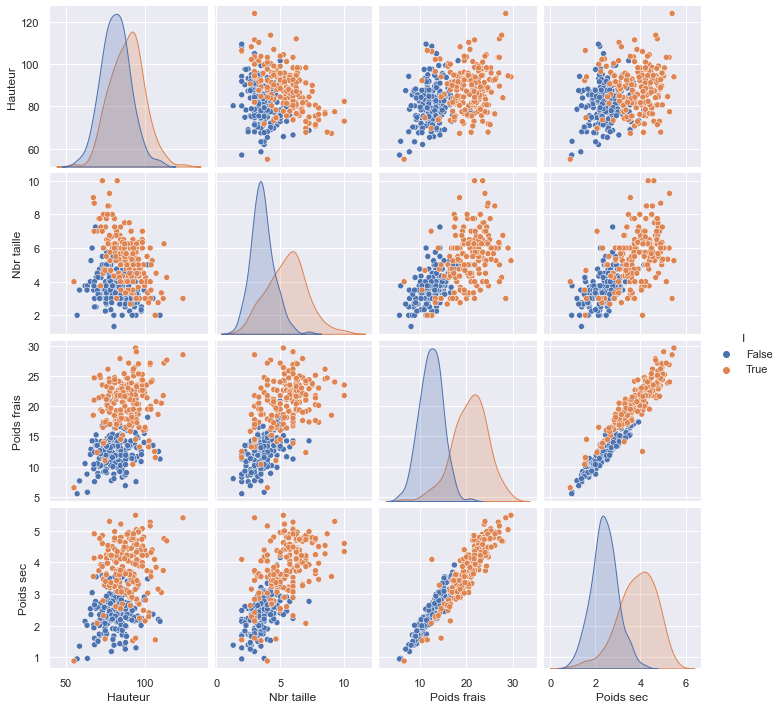

In [12]:
sns.pairplot(data, hue="I")
plt.show()

## Valeurs manquantes

In [13]:
data[data['Hauteur'].isna()]

,Hauteur,Nbr taille,Poids frais,Poids sec,I
Nom plante,,,,,
317,NaN,NaN,NaN,NaN,False
317,NaN,NaN,NaN,NaN,True


In [14]:
data.dropna(inplace=True)

## Analyse des distributions

### Hauteur des plants

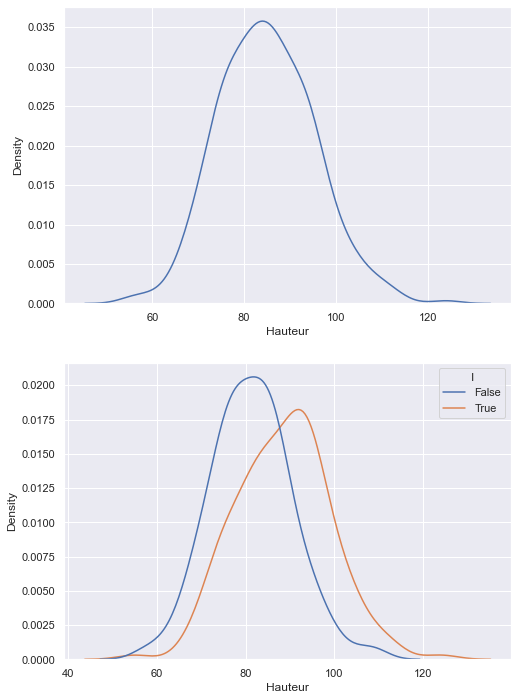

In [15]:
f, axes = plt.subplots(2, figsize=(8, 12))
sns.kdeplot(data=data, x='Hauteur', ax=axes[0])
sns.kdeplot(data=data, x='Hauteur', hue="I", ax=axes[1])
plt.show()

#### Normal test

##### Using shapiro

Null hypothesis: the sample follows a normal distribution.

Therefore, if the p-value of the test is significant, the sample does not follow a normal distribution.

In [16]:
def shapiro_test(x, alpha=0.05):
    print('Shapiro test'.center(50, '-'))
    statistic, p = stats.shapiro(x)
    print('statistic'.ljust(20), end='')
    print(statistic)
    print('p-value'.ljust(20), end='')
    print(p)
    if p < alpha:  # null hypothesis: x comes from a normal distribution
        print('The null hypothesis can be rejected')
        print('The distribution is not a normal')
    else:
        print('The null hypothesis cannot be rejected')
        print('The distribution seems to be normal')

In [17]:
shapiro_test(data['Hauteur'])

-------------------Shapiro test-------------------
statistic           0.9952386617660522
p-value             0.35122939944267273
The null hypothesis cannot be rejected
The distribution seems to be normal


In [18]:
shapiro_test(data[data['I'] == True]['Hauteur'])

-------------------Shapiro test-------------------
statistic           0.9941830635070801
p-value             0.7145191431045532
The null hypothesis cannot be rejected
The distribution seems to be normal


In [19]:
shapiro_test(data[data['I'] == False]['Hauteur'])

-------------------Shapiro test-------------------
statistic           0.99428790807724
p-value             0.7284841537475586
The null hypothesis cannot be rejected
The distribution seems to be normal


The distributions seems to be normal. The both groups seems to follow a normal distribution. The resulting distribution of the combination of the two groups seems to be a normal one too.

### Poids frais

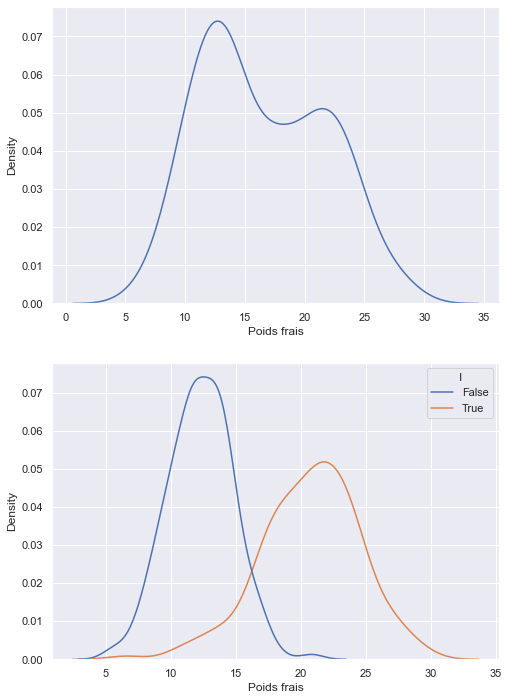

In [20]:
f, axes = plt.subplots(2, figsize=(8, 12))
sns.kdeplot(data=data, x='Poids frais', ax=axes[0])
sns.kdeplot(data=data, x='Poids frais', hue="I", ax=axes[1])
plt.show()

In [21]:
shapiro_test(data['Poids frais'])

-------------------Shapiro test-------------------
statistic           0.9679602980613708
p-value             4.978640504305076e-07
The null hypothesis can be rejected
The distribution is not a normal


In [22]:
shapiro_test(data[data['I'] == True]['Poids frais'])

-------------------Shapiro test-------------------
statistic           0.9845100045204163
p-value             0.047174811363220215
The null hypothesis can be rejected
The distribution is not a normal


#### Groupe innoculé
##### Check for outliers

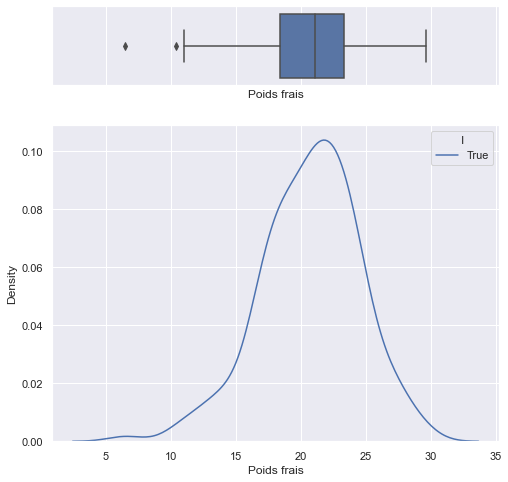

In [23]:
kwrgs = {"height_ratios": (.2, .8)}
f, axes = plt.subplots(2, figsize=(8, 8), sharex=True, gridspec_kw=kwrgs)
sns.boxplot(data=data[data['I'] == True], x='Poids frais', ax=axes[0], hue='I')
sns.kdeplot(data=data[data['I'] == True], x='Poids frais', hue="I", ax=axes[1])
plt.show()

##### Remove outliers

In [24]:
iqr = stats.iqr(data[data['I'] == True]['Poids frais'])
print(f"IQR : {iqr}")
q1 = data[data['I'] == True]['Poids frais'].quantile(0.25)
q3 = data[data['I'] == True]['Poids frais'].quantile(0.75)
print(f'Q1 : {q1} -- Q3 : {q3}')
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
print(f'low : {lower_bound} -- upper : {upper_bound}')

IQR : 4.958333333333332
Q1 : 18.375 -- Q3 : 23.333333333333332
low : 10.937500000000002 -- upper : 30.77083333333333


In [25]:
inoc = data[data['I'] == True]['Poids frais']
inoc

Nom plante
2      18.500000
5      17.375000
8      16.750000
9      23.500000
13     23.375000
         ...    
350    17.250000
355    24.000000
363    19.666667
374    21.625000
377    19.500000
Name: Poids frais, Length: 177, dtype: float64

In [26]:
inoc_no = inoc[(inoc > lower_bound) & (inoc < upper_bound)]

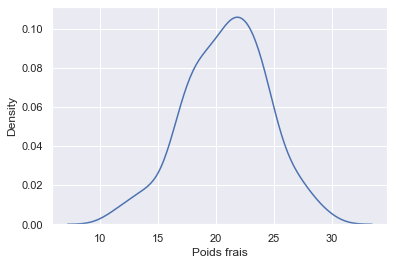

In [27]:
sns.kdeplot(inoc_no)
plt.show()

##### Shapiro test

In [28]:
shapiro_test(inoc_no)

-------------------Shapiro test-------------------
statistic           0.993212878704071
p-value             0.5933870673179626
The null hypothesis cannot be rejected
The distribution seems to be normal


#### Groupe témoin

##### Check outliers

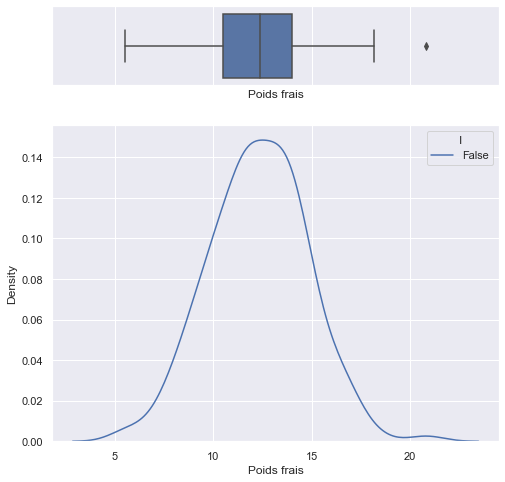

In [29]:
kwrgs = {"height_ratios": (.2, .8)}
f, axes = plt.subplots(2, figsize=(8, 8), sharex=True, gridspec_kw=kwrgs)
sns.boxplot(data=data[data['I'] == False], x='Poids frais', ax=axes[0], hue='I')
sns.kdeplot(data=data[data['I'] == False], x='Poids frais', hue="I", ax=axes[1])
plt.show()

##### remove the outlier

In [30]:
iqr = stats.iqr(data[data['I'] == False]['Poids frais'])
print(f"IQR : {iqr}")
q1 = data[data['I'] == False]['Poids frais'].quantile(0.25)
q3 = data[data['I'] == False]['Poids frais'].quantile(0.75)
print(f'Q1 : {q1} -- Q3 : {q3}')
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
print(f'low : {lower_bound} -- upper : {upper_bound}')

IQR : 3.5
Q1 : 10.5 -- Q3 : 14.0
low : 5.25 -- upper : 19.25


In [31]:
shapiro_test(data[data['I'] == False]['Poids frais'])

-------------------Shapiro test-------------------
statistic           0.995589554309845
p-value             0.8848446607589722
The null hypothesis cannot be rejected
The distribution seems to be normal


In [32]:
ninoc = data[data['I'] == False]['Poids frais']
ninoc

Nom plante
2      14.250000
5      11.250000
8      16.000000
9       9.875000
13     14.250000
         ...    
350    11.875000
355    11.333333
363    12.625000
374    13.375000
377    10.333333
Name: Poids frais, Length: 177, dtype: float64

In [33]:
ninoc_no = ninoc[(ninoc > lower_bound) & (ninoc < upper_bound)]

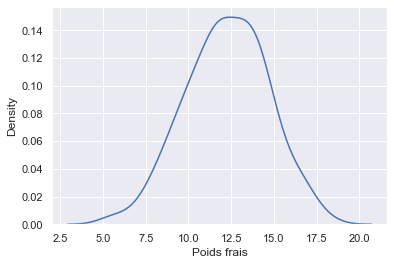

In [34]:
sns.kdeplot(ninoc_no)
plt.show()

##### Shapiro test

In [35]:
shapiro_test(ninoc_no)

-------------------Shapiro test-------------------
statistic           0.994988203048706
p-value             0.8207541704177856
The null hypothesis cannot be rejected
The distribution seems to be normal


In [36]:
def bartlett_test(x1, x2, alpha=0.05):
    """bartlett_test
    
    Bartlett’s test tests the null hypothesis 
    that all input samples are from populations 
    with equal variances. 
    
    For samples from significantly non-normal populations, 
    Levene’s test levene is more robust.
    """
    print('Bartlett test'.center(50, '-'))
    print('var x1'.ljust(20), end='')
    print(x1.var())
    print('var x2'.ljust(20), end='')
    print(x2.var())
    k2, p = stats.bartlett(x1, x2)
    print('k2'.ljust(20), end='')
    print(k2)
    print('p-value'.ljust(20), end='')
    print(p)
    if p < alpha:  # null hypothesis: x comes from a normal distribution
        print('The null hypothesis can be rejected')
    else:
        print('The null hypothesis cannot be rejected')


#### Bartlett

In [37]:
bartlett_test(inoc_no, ninoc_no)

------------------Bartlett test-------------------
var x1              12.906940795475276
var x2              5.815361942189752
k2                  26.96690464135627
p-value             2.0696905500110685e-07
The null hypothesis can be rejected


#### Kruskal test

H$_0$ $\mu_1$ = $\mu_2$

H$_a$ $\mu_1$ $\ne$$\mu_2$

In [38]:
def kruskal_test(x1, x2, alpha=0.05):
    """kruskal_test
    
    The Kruskal-Wallis H-test tests the null hypothesis 
    that the population median of all of the groups are equal. 
    It is a non-parametric version of ANOVA. 
    The test works on 2 or more independent samples, 
    which may have different sizes. 
    Note that rejecting the null hypothesis does not indicate 
    hich of the groups differs. 
    Post hoc comparisons between groups are required to 
    determine which groups are different.
    """
    print('Kruskal test'.center(50, '-'))
    s, p = stats.kruskal(x1, x2)
    print('statistic'.ljust(20), end='')
    print(s)
    print('p-value'.ljust(20), end='')
    print(p)
    if p < alpha:  # null hypothesis: x comes from a normal distribution
        print('The null hypothesis can be rejected')
        print('M1 != M2')
    else:
        print('The null hypothesis cannot be rejected')
        print('M1 = M2')

In [39]:
kruskal_test(inoc, inoc_no)

-------------------Kruskal test-------------------
statistic           0.03361964805892405
p-value             0.8545182153626611
The null hypothesis cannot be rejected
M1 = M2


### Poids sec

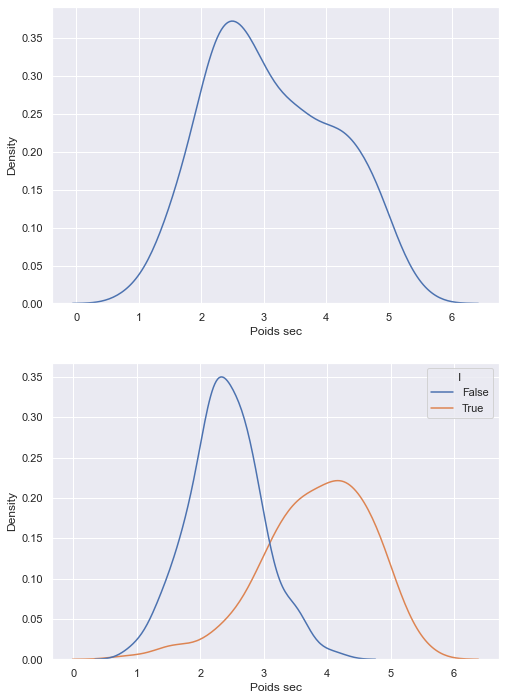

In [40]:
f, axes = plt.subplots(2, figsize=(8, 12))
sns.kdeplot(data=data, x='Poids sec', ax=axes[0])
sns.kdeplot(data=data, x='Poids sec', hue="I", ax=axes[1])
plt.show()

In [41]:
shapiro_test(data['Poids sec'])

-------------------Shapiro test-------------------
statistic           0.9765350222587585
p-value             1.6223470083787106e-05
The null hypothesis can be rejected
The distribution is not a normal


#### Groupe inoculé

In [42]:
shapiro_test(data[data['I'] == True]['Poids sec'])

-------------------Shapiro test-------------------
statistic           0.9715785384178162
p-value             0.0011040248209610581
The null hypothesis can be rejected
The distribution is not a normal


##### Check for outliers

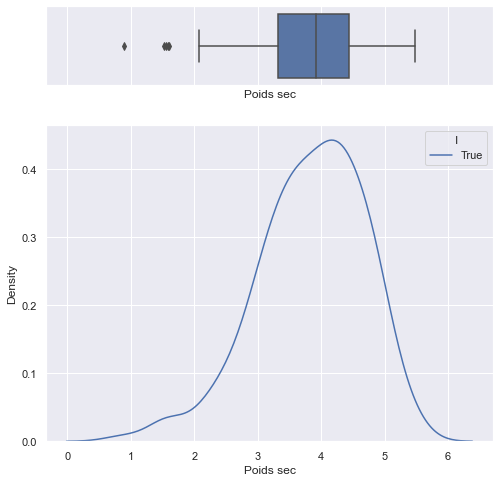

In [43]:
kwrgs = {"height_ratios": (.2, .8)}
f, axes = plt.subplots(2, figsize=(8, 8), sharex=True, gridspec_kw=kwrgs)
sns.boxplot(data=data[data['I'] == True], x='Poids sec', ax=axes[0], hue='I')
sns.kdeplot(data=data[data['I'] == True], x='Poids sec', hue="I", ax=axes[1])
plt.show()

##### Remove outliers

In [44]:
iqr = stats.iqr(data[data['I'] == True]['Poids sec'])
print(f"IQR : {iqr}")
q1 = data[data['I'] == True]['Poids sec'].quantile(0.25)
q3 = data[data['I'] == True]['Poids sec'].quantile(0.75)
print(f'Q1 : {q1} -- Q3 : {q3}')
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
print(f'low : {lower_bound} -- upper : {upper_bound}')

IQR : 1.1266666666666674
Q1 : 3.313333333333333 -- Q3 : 4.44
low : 1.623333333333332 -- upper : 6.130000000000002


In [45]:
inoc = data[data['I'] == True]['Poids sec']
inoc

Nom plante
2      3.553250
5      3.521750
8      3.047000
9      4.619000
13     4.880750
         ...   
350    3.420750
355    4.312333
363    3.359000
374    4.111500
377    3.549750
Name: Poids sec, Length: 177, dtype: float64

In [46]:
inoc_no = inoc[(inoc > lower_bound) & (inoc < upper_bound)]

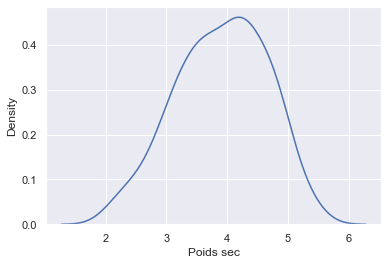

In [47]:
sns.kdeplot(inoc_no)
plt.show()

##### Shapiro test

In [48]:
shapiro_test(inoc_no)

-------------------Shapiro test-------------------
statistic           0.9862927794456482
p-value             0.09098831564188004
The null hypothesis cannot be rejected
The distribution seems to be normal


#### Groupe témoin

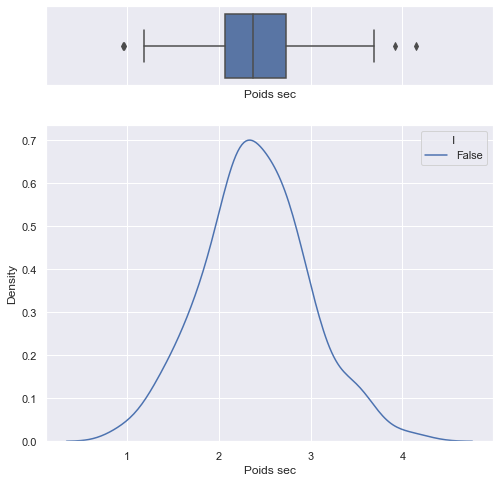

In [49]:
kwrgs = {"height_ratios": (.2, .8)}
f, axes = plt.subplots(2, figsize=(8, 8), sharex=True, gridspec_kw=kwrgs)
sns.boxplot(data=data[data['I'] == False], x='Poids sec', ax=axes[0], hue='I')
sns.kdeplot(data=data[data['I'] == False], x='Poids sec', hue="I", ax=axes[1])
plt.show()

##### remove outliers

In [50]:
iqr = stats.iqr(data[data['I'] == False]['Poids sec'])
print(f"IQR : {iqr}")
q1 = data[data['I'] == False]['Poids sec'].quantile(0.25)
q3 = data[data['I'] == False]['Poids sec'].quantile(0.75)
print(f'Q1 : {q1} -- Q3 : {q3}')
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
print(f'low : {lower_bound} -- upper : {upper_bound}')

IQR : 0.6635
Q1 : 2.068 -- Q3 : 2.7315
low : 1.07275 -- upper : 3.72675


In [51]:
shapiro_test(data[data['I'] == False]['Poids sec'])

-------------------Shapiro test-------------------
statistic           0.9946087598800659
p-value             0.770474910736084
The null hypothesis cannot be rejected
The distribution seems to be normal


In [52]:
ninoc = data[data['I'] == False]['Poids sec']
ninoc

Nom plante
2      2.766500
5      2.306750
8      3.403500
9      1.907250
13     2.946500
         ...   
350    2.637500
355    2.175667
363    2.345500
374    2.932000
377    1.998667
Name: Poids sec, Length: 177, dtype: float64

In [53]:
ninoc_no = ninoc[(ninoc > lower_bound) & (ninoc < upper_bound)]

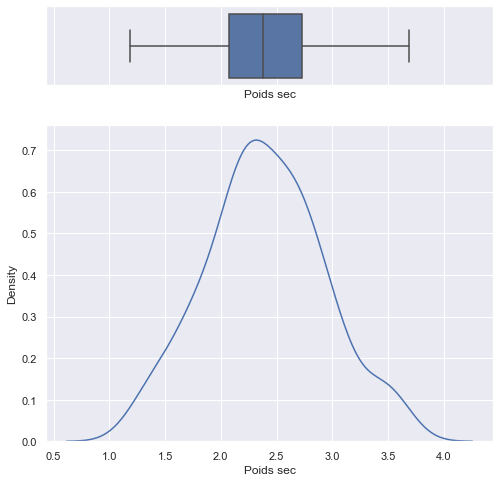

In [54]:
kwrgs = {"height_ratios": (.2, .8)}
f, axes = plt.subplots(2, figsize=(8, 8), sharex=True, gridspec_kw=kwrgs)
sns.boxplot(x=ninoc_no, ax=axes[0])
sns.kdeplot(x=ninoc_no, ax=axes[1])
plt.show()

##### Shapiro test

In [55]:
shapiro_test(ninoc_no)

-------------------Shapiro test-------------------
statistic           0.9918846487998962
p-value             0.4406212866306305
The null hypothesis cannot be rejected
The distribution seems to be normal


#### Bartlett

H$_0$ : $\sigma_1$ = $\sigma_2$

H$_a$ : $\sigma_1$ $\ne$$\sigma_2$

In [56]:
bartlett_test(inoc_no, ninoc_no)

------------------Bartlett test-------------------
var x1              0.5589340755783261
var x2              0.2819148544611921
k2                  19.65944255556879
p-value             9.254485489257885e-06
The null hypothesis can be rejected


#### Kruskal test

H$_0$ $\mu_1$ = $\mu_2$

H$_a$ $\mu_1$ $\ne$$\mu_2$

In [57]:
kruskal_test(inoc, inoc_no)

-------------------Kruskal test-------------------
statistic           0.20823773618827446
p-value             0.6481521684566947
The null hypothesis cannot be rejected
M1 = M2
